**In this notebook we compare different torch optimizers applied for solving transport task**

In [1]:
from model import Model
from data_reader.data_reader import *
from torch import optim
from matplotlib import pyplot as plt
from time import time

In [2]:
data_reader = DataReader()
data_reader.read_all("data/Anaheim_net.tntp", "data/Anaheim_trips.tntp", "data/Anaheim_flow.tntp")

In [3]:
num_iters=1000

**General solve function wrapper, measures work time**

In [4]:
def solve(model, optimizer, num_iters=num_iters, verbose=True):    
    start_time = time()

    flows_history, primal_values, duality_gap_history = model.solve(optimizer, num_iters=num_iters, loss_history=True, verbose=verbose)

    end_time = time()
    
    seconds_elapsed = end_time - start_time
    print("Time elapsed:", seconds_elapsed, "seconds")

    avg_step_time = seconds_elapsed / num_iters
    print("Average step time:", avg_step_time, "seconds")
    
    return flows_history, primal_values, duality_gap_history, seconds_elapsed

# Check if graph correspondences are satisfied
def check_graph(model, flows):
    return model.graph.check_graph(flows, model.graph_correspondences)

# SGD

In [5]:
# model saves progress
sgd_model = Model(data_reader)
sgd_optimizer = optim.SGD([sgd_model.t], lr=0.0000004, momentum=0.9)

In [6]:
sgd_flows, sgd_primal_vals, sgd_duality_gap, sgd_seconds = solve(sgd_model, sgd_optimizer, verbose=False)

Time elapsed: 143.10545897483826 seconds
Average step time: 0.14310545897483826 seconds


# RMSprop

In [7]:
rmsprop_model = Model(data_reader)
rmsprop_optimizer = optim.RMSprop([rmsprop_model.t], lr=0.005)

In [8]:
rmsprop_flows, rmsprop_primal_vals, rmsprop_duality_gap, rmsprop_seconds = solve(rmsprop_model, rmsprop_optimizer, verbose=False)

Time elapsed: 138.78932070732117 seconds
Average step time: 0.13878932070732117 seconds


# Adam

In [9]:
adam_model = Model(data_reader)
adam_optimizer = optim.Adam([adam_model.t], lr=0.01)

In [10]:
adam_flows, adam_primal_vals, adam_duality_gap, adam_seconds = solve(adam_model, adam_optimizer, verbose=True)

primal_value = 1264517.8831331283 ; duality_gap = 98690.36598225893
primal_value = 1260035.5755547055 ; duality_gap = 87020.77982452628
primal_value = 1257347.3126635812 ; duality_gap = 79748.98608383723
primal_value = 1254830.3431697458 ; duality_gap = 75966.76209116401
primal_value = 1252342.8741562706 ; duality_gap = 72746.95134070981
primal_value = 1248494.8301533074 ; duality_gap = 67653.03083660384
primal_value = 1246167.391041511 ; duality_gap = 63556.783310105326
primal_value = 1243907.9153494318 ; duality_gap = 59477.96936468361
primal_value = 1243225.4289357588 ; duality_gap = 57573.4237420666
primal_value = 1242438.8194794364 ; duality_gap = 56481.10148470593
primal_value = 1234327.2433667772 ; duality_gap = 47457.52533740923
primal_value = 1231165.6120827661 ; duality_gap = 43300.578366407426
primal_value = 1228888.5378503245 ; duality_gap = 40072.15318303113
primal_value = 1226590.9003707517 ; duality_gap = 37118.57464495604
primal_value = 1223416.5433760209 ; duality_gap 

primal_value = 1206681.997217193 ; duality_gap = 2860.1521872838493
primal_value = 1206668.9740850164 ; duality_gap = 2803.0314128920436
primal_value = 1206656.098594636 ; duality_gap = 2800.5179871020373
primal_value = 1206648.0434378253 ; duality_gap = 2754.728556680493
primal_value = 1206652.9065434602 ; duality_gap = 2765.4421440139413
primal_value = 1206628.5724959671 ; duality_gap = 2789.0402667182498
primal_value = 1206594.2623150384 ; duality_gap = 2641.979307931848
primal_value = 1206585.5514510048 ; duality_gap = 2656.9523587371223
primal_value = 1206580.4043143666 ; duality_gap = 2619.1380169661716
primal_value = 1206575.0168891535 ; duality_gap = 2633.2809741781093
primal_value = 1206540.17135501 ; duality_gap = 2555.505064310506
primal_value = 1206514.9674261853 ; duality_gap = 2483.1996377652977
primal_value = 1206515.2006439536 ; duality_gap = 2426.8995608100668
primal_value = 1206509.5026035632 ; duality_gap = 2475.1947435832117
primal_value = 1206503.0241204835 ; duali

primal_value = 1205933.3355491555 ; duality_gap = 1033.3136809761636
primal_value = 1205926.7289745018 ; duality_gap = 1054.5357417408377
primal_value = 1205925.682968546 ; duality_gap = 1087.2664016466588
primal_value = 1205924.9235048958 ; duality_gap = 1004.6716170820873
primal_value = 1205919.5185250803 ; duality_gap = 1013.3288398722652
primal_value = 1205914.1040244908 ; duality_gap = 995.0649068427738
primal_value = 1205913.8245609922 ; duality_gap = 988.0771403352264
primal_value = 1205914.3995770088 ; duality_gap = 960.2195276268758
primal_value = 1205913.846326518 ; duality_gap = 961.6462168057915
primal_value = 1205908.7340301957 ; duality_gap = 1030.279092559591
primal_value = 1205900.4119630565 ; duality_gap = 977.0713035617955
primal_value = 1205899.0295502604 ; duality_gap = 956.62809337629
primal_value = 1205902.4248668738 ; duality_gap = 967.3595957492944
primal_value = 1205903.6402692073 ; duality_gap = 962.6891726939939
primal_value = 1205899.865730258 ; duality_gap 

primal_value = 1205786.0018279369 ; duality_gap = 658.9320852626115
primal_value = 1205786.6290624077 ; duality_gap = 579.2043825355358
primal_value = 1205785.274639197 ; duality_gap = 597.8043931988068
primal_value = 1205783.447069059 ; duality_gap = 606.6711803411599
primal_value = 1205783.9044306215 ; duality_gap = 645.557846139418
primal_value = 1205784.055043694 ; duality_gap = 576.9056584520731
primal_value = 1205784.1308874907 ; duality_gap = 630.709867290454
primal_value = 1205782.524165068 ; duality_gap = 622.6990954752546
primal_value = 1205780.9514551465 ; duality_gap = 596.3040075555909
primal_value = 1205781.2817870048 ; duality_gap = 644.8521697721444
primal_value = 1205781.1811174578 ; duality_gap = 643.3904771546368
primal_value = 1205781.0584870516 ; duality_gap = 560.6035839985125
primal_value = 1205782.4837705835 ; duality_gap = 649.5156678080093
primal_value = 1205781.729594204 ; duality_gap = 692.2976747120265
primal_value = 1205779.29317569 ; duality_gap = 581.252

primal_value = 1205747.52353314 ; duality_gap = 478.4295939700678
primal_value = 1205747.9375256288 ; duality_gap = 471.05787486373447
primal_value = 1205748.3681957421 ; duality_gap = 483.6175654765684
primal_value = 1205747.2104259646 ; duality_gap = 539.5553353123832
primal_value = 1205747.259678992 ; duality_gap = 507.20647184201516
primal_value = 1205746.343849603 ; duality_gap = 524.7103498966899
primal_value = 1205746.4947477803 ; duality_gap = 523.6687503044959
primal_value = 1205746.8646624028 ; duality_gap = 536.2680035838857
primal_value = 1205745.2988154383 ; duality_gap = 453.4172522115987
primal_value = 1205745.4358465848 ; duality_gap = 511.3661617585458
primal_value = 1205746.781809244 ; duality_gap = 497.6243721060455
primal_value = 1205747.0892482137 ; duality_gap = 527.4144139701966
primal_value = 1205745.6810969221 ; duality_gap = 522.738859027857
primal_value = 1205744.641751654 ; duality_gap = 536.6496182517149
primal_value = 1205745.135304983 ; duality_gap = 527.

primal_value = 1205730.269098558 ; duality_gap = 545.7832560795359
primal_value = 1205729.6894919185 ; duality_gap = 561.9056848555338
primal_value = 1205729.6876657403 ; duality_gap = 496.2505045256112
primal_value = 1205729.548551124 ; duality_gap = 556.9774001440965
primal_value = 1205729.8887920869 ; duality_gap = 588.9802303116303
primal_value = 1205730.0983216683 ; duality_gap = 583.8604700269643
primal_value = 1205729.4289132904 ; duality_gap = 570.1198628249113
primal_value = 1205729.186233233 ; duality_gap = 500.40401365584694
primal_value = 1205728.6365086178 ; duality_gap = 529.1858817352913
primal_value = 1205729.047416129 ; duality_gap = 588.2807673891075
primal_value = 1205729.1113933665 ; duality_gap = 582.028719306225
primal_value = 1205729.3428357798 ; duality_gap = 584.7418132789899
primal_value = 1205728.866214288 ; duality_gap = 607.0328789441846
primal_value = 1205728.2245853227 ; duality_gap = 555.9274490890093
primal_value = 1205727.7152310014 ; duality_gap = 494

primal_value = 1205720.4482479722 ; duality_gap = 525.6085720458068
primal_value = 1205720.0991174746 ; duality_gap = 511.76648167101666
primal_value = 1205719.8753102825 ; duality_gap = 449.5692807349842
primal_value = 1205719.80482153 ; duality_gap = 485.65501699084416
primal_value = 1205720.1675445875 ; duality_gap = 457.9076794765424
primal_value = 1205720.5387645778 ; duality_gap = 461.69430783577263
primal_value = 1205720.2836870493 ; duality_gap = 485.19861699058674
primal_value = 1205720.3883255252 ; duality_gap = 473.18873506388627
primal_value = 1205720.2110448855 ; duality_gap = 486.62229868094437
primal_value = 1205719.6157934251 ; duality_gap = 484.05704565765336
primal_value = 1205719.6281841816 ; duality_gap = 550.6974533777684
primal_value = 1205719.6595180288 ; duality_gap = 526.8939342657104
primal_value = 1205719.9896517645 ; duality_gap = 522.3429029462859
primal_value = 1205719.7078905217 ; duality_gap = 556.4408080461435
primal_value = 1205719.1358531252 ; duality

primal_value = 1205714.7061965978 ; duality_gap = 512.1820641355589
primal_value = 1205714.6163734754 ; duality_gap = 584.8902334780432
primal_value = 1205714.566534383 ; duality_gap = 647.8992467888165
primal_value = 1205714.4970131454 ; duality_gap = 528.309169911081
primal_value = 1205714.729024443 ; duality_gap = 495.8108778996393
primal_value = 1205714.4942961894 ; duality_gap = 508.37687494419515
primal_value = 1205714.250720268 ; duality_gap = 548.9894234016538
primal_value = 1205714.3849568856 ; duality_gap = 500.79841521335766
primal_value = 1205714.3368048952 ; duality_gap = 598.8906835340895
primal_value = 1205714.413999221 ; duality_gap = 510.2600213184487
primal_value = 1205714.5639810439 ; duality_gap = 485.2098672988359
primal_value = 1205714.6217874342 ; duality_gap = 553.9736082688905
primal_value = 1205714.1823471577 ; duality_gap = 563.32645430509
primal_value = 1205713.9920401217 ; duality_gap = 504.9078703986015
primal_value = 1205714.2291130226 ; duality_gap = 514

primal_value = 1205710.4745453487 ; duality_gap = 500.85231861379
primal_value = 1205710.5057546382 ; duality_gap = 488.86634963937104
primal_value = 1205710.591576951 ; duality_gap = 475.92120936349966
primal_value = 1205710.872552767 ; duality_gap = 487.47871368564665
primal_value = 1205710.596804066 ; duality_gap = 512.5445705801249
primal_value = 1205710.3109813984 ; duality_gap = 438.568276691949
primal_value = 1205710.5207577571 ; duality_gap = 471.47725281422026
primal_value = 1205710.5856354223 ; duality_gap = 436.19437982630916
primal_value = 1205710.568888003 ; duality_gap = 455.5746670195367
primal_value = 1205710.505020992 ; duality_gap = 476.03220141795464
primal_value = 1205710.6592795523 ; duality_gap = 448.44646289013326
primal_value = 1205710.4265551493 ; duality_gap = 429.5123006820213
primal_value = 1205710.516073116 ; duality_gap = 462.0348594172392
primal_value = 1205710.4319066328 ; duality_gap = 551.6775482422672
primal_value = 1205710.385963926 ; duality_gap = 4

# ASGD

In [11]:
asgd_model = Model(data_reader)
asgd_optimizer = optim.ASGD([asgd_model.t], lr=0.000005)

In [12]:
asgd_flows, asgd_primal_vals, asgd_duality_gap, asgd_seconds = solve(asgd_model, asgd_optimizer, verbose=False)

Time elapsed: 141.07816982269287 seconds
Average step time: 0.14107816982269286 seconds


# All methods in one plot

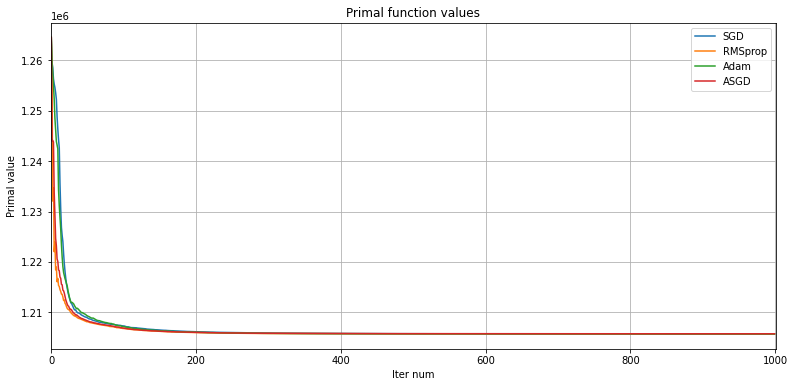

In [13]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_iters), sgd_primal_vals, label='SGD')
plt.plot(range(num_iters), rmsprop_primal_vals, label='RMSprop')
plt.plot(range(num_iters), adam_primal_vals, label='Adam')
plt.plot(range(num_iters), asgd_primal_vals, label='ASGD')

plt.title('Primal function values')
plt.xlim((-1, num_iters+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Primal value')
plt.grid()
plt.show()

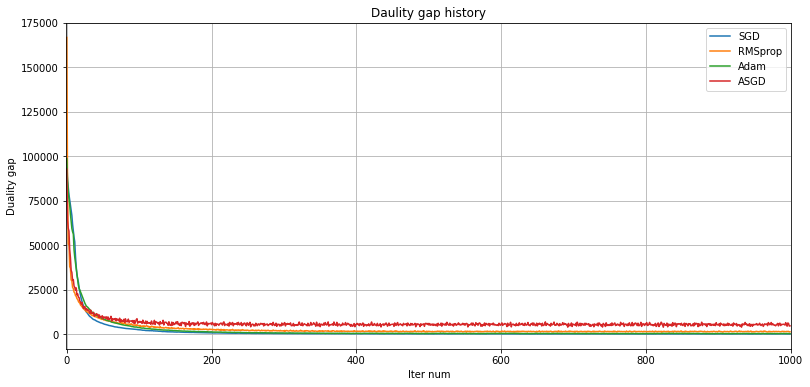

In [14]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_iters), sgd_duality_gap, label='SGD')
plt.plot(range(num_iters), rmsprop_duality_gap, label='RMSprop')
plt.plot(range(num_iters), adam_duality_gap, label='Adam')
plt.plot(range(num_iters), asgd_duality_gap, label='ASGD')

plt.title('Daulity gap history')
plt.xlim((-1, num_iters+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Duality gap')
plt.grid()
plt.show()

# First 200 iterations

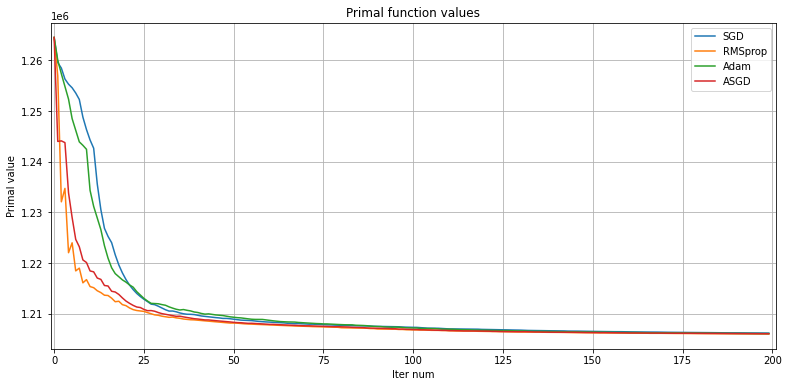

In [17]:
lim=200
plt.figure(figsize=(13, 6))
plt.plot(range(lim), sgd_primal_vals[:lim], label='SGD')
plt.plot(range(lim), rmsprop_primal_vals[:lim], label='RMSprop')
plt.plot(range(lim), adam_primal_vals[:lim], label='Adam')
plt.plot(range(lim), asgd_primal_vals[:lim], label='ASGD')

plt.title('Primal function values')
plt.xlim((-1, lim+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Primal value')
plt.grid()
plt.show()

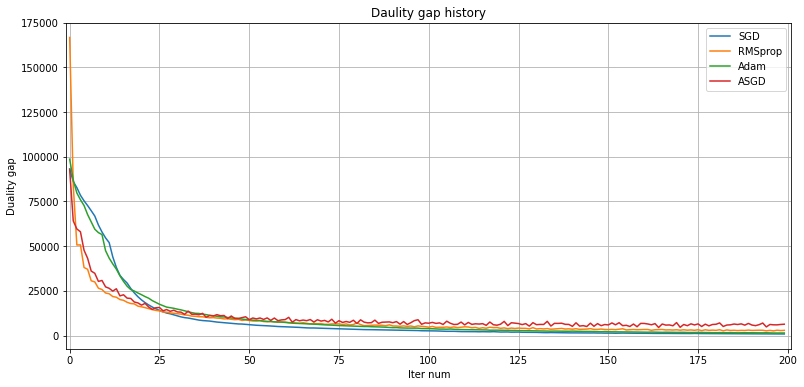

In [18]:
plt.figure(figsize=(13, 6))
plt.plot(range(lim), sgd_duality_gap[:lim], label='SGD')
plt.plot(range(lim), rmsprop_duality_gap[:lim], label='RMSprop')
plt.plot(range(lim), adam_duality_gap[:lim], label='Adam')
plt.plot(range(lim), asgd_duality_gap[:lim], label='ASGD')

plt.title('Daulity gap history')
plt.xlim((-1, lim+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Duality gap')
plt.grid()
plt.show()

# Independent plots

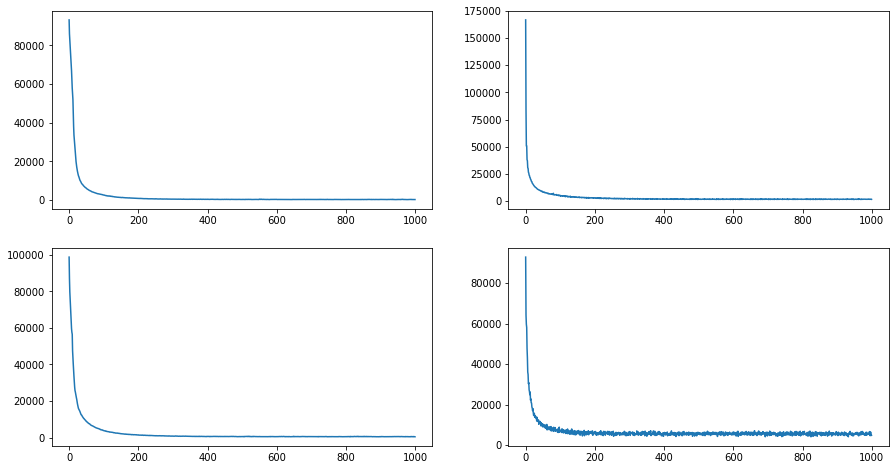

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

ax[0, 0].plot(range(num_iters), sgd_duality_gap, label='SGD')
ax[0, 1].plot(range(num_iters), rmsprop_duality_gap, label='RMSprop')
ax[1, 0].plot(range(num_iters), adam_duality_gap, label='Adam')
ax[1, 1].plot(range(num_iters), asgd_duality_gap, label='ASGD')

plt.show()